inizializzare il file importando il dataset

In [1]:
from sklearn.neural_network import MLPClassifier
from torchvision.datasets import MNIST
from torchvision.transforms import Lambda
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np

mnist_train = MNIST(root="../mnist",
                    train=True,
                    download=True)
mnist_test = MNIST(root="../mnist",
                    train=False,
                    download=True)

mnist_train_data, mnist_train_targets = mnist_train.data.numpy(), mnist_train.targets.numpy()
mnist_test_data, mnist_test_targets = mnist_test.data.numpy(), mnist_test.targets.numpy()

mnist_train_data = mnist_train_data.reshape(60000, 28*28)
mnist_test_data = mnist_test_data.reshape(10000, 28*28)

mnist_train_data = mnist_train_data / 255
mnist_test_data = mnist_test_data / 255

random_state = 0

100%|██████████| 9912422/9912422 [00:00<00:00, 83523268.08it/s]


Extracting ../mnist/MNIST/raw/train-images-idx3-ubyte.gz to ../mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 86835622.81it/s]


Extracting ../mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ../mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26652066.36it/s]


Extracting ../mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ../mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21027073.70it/s]


Extracting ../mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../mnist/MNIST/raw



# test della performance del MLP con diverse combinazione di neuroni

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

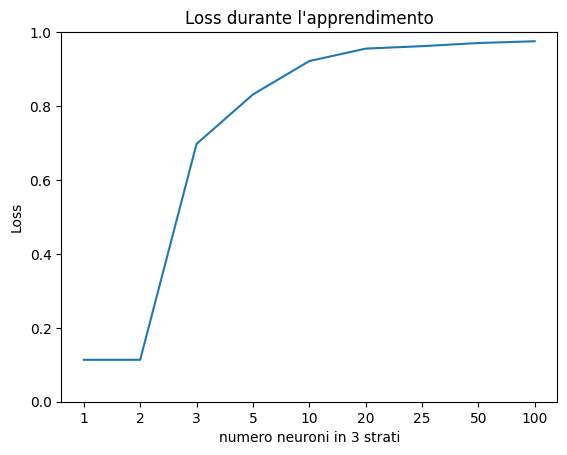

In [ ]:

accuratezza=[]
layers =[1,2,3,5,10,20,25,50,100]

for i in layers:
    MLP = MLPClassifier(hidden_layer_sizes=(i, i, i),
                    max_iter = 10,
                    random_state=random_state)

    MLP= MLP.fit(mnist_train_data, mnist_train_targets)
    test_predictions = MLP.predict(mnist_test_data)
    accuratezza.append(MLP.score(mnist_test_data, mnist_test_targets))

_ = plt.plot(list(map(str,layers)), accuratezza)
_ = plt.xlabel("numero neuroni in 3 strati")
_ = plt.ylabel("Loss")
_ = plt.ylim((0,1))
_ = plt.title("Loss durante l'apprendimento")

# test della performance del MLP con 50 neuroni per strato e numero strati variabile con alpha = 0

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

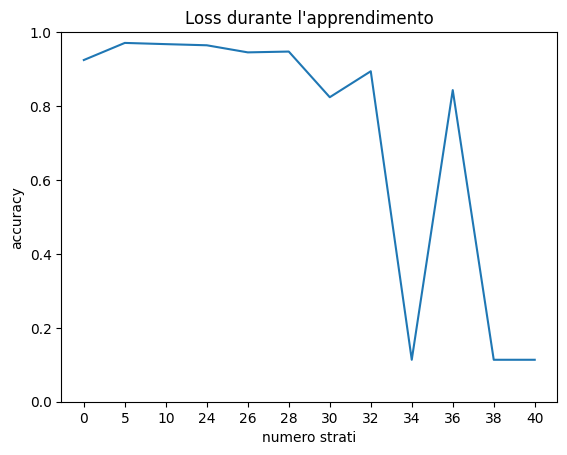

In [6]:

accuratezza=[]
neurons=50
layers =[0,5,10,24,26,28,30,32,34,36,38,40]
for i in layers:
    MLP = MLPClassifier(hidden_layer_sizes=(neurons,) * i,
                    max_iter = 10,
                    random_state=random_state
                    # random_state=random_state,
                    # alpha = 0.0001, #default=0.0001
                    # learning_rate= "adaptive",#learning_rate{constant, invscaling, adaptive}, default=constant
                    # learning_rate_init   = 0.1 #float, default=0.001
                    )

    MLP= MLP.fit(mnist_train_data, mnist_train_targets)
    test_predictions = MLP.predict(mnist_test_data)
    accuratezza.append(MLP.score(mnist_test_data, mnist_test_targets))

_ = plt.plot(list(map(str,layers)), accuratezza)
_ = plt.xlabel("numero strati")
_ = plt.ylabel("accuracy")
_ = plt.ylim((0,1))
_ = plt.title("Loss durante l'apprendimento")


# test della performance del MLP con 50 strati e numero di neuroni variabili

/home/mircea/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mircea/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mircea/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mircea/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/mircea/.local/lib/python3.10/site-packages/skl

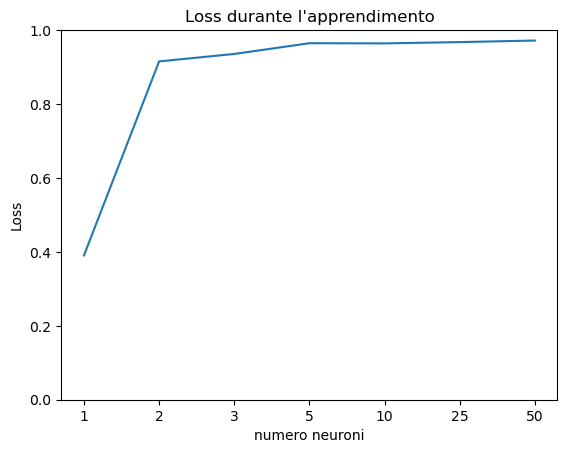

In [ ]:

accuratezza=[]
layers =[1,2,3,5,10,25,50]

for i in layers:
    MLP = MLPClassifier(hidden_layer_sizes=(50, i),
                    max_iter = 10,
                    random_state=random_state)

    MLP= MLP.fit(mnist_train_data, mnist_train_targets)
    test_predictions = MLP.predict(mnist_test_data)
    accuratezza.append(MLP.score(mnist_test_data, mnist_test_targets))

_ = plt.plot(list(map(str,layers)), accuratezza)
_ = plt.xlabel("numero neuroni")
_ = plt.ylabel("Loss")
_ = plt.ylim((0,1))
_ = plt.title("Loss durante l'apprendimento")


#  Quali altri iper-parametri hanno un effetto significativo sull’apprendimento

iperparametro activationFunction di iterazioni

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


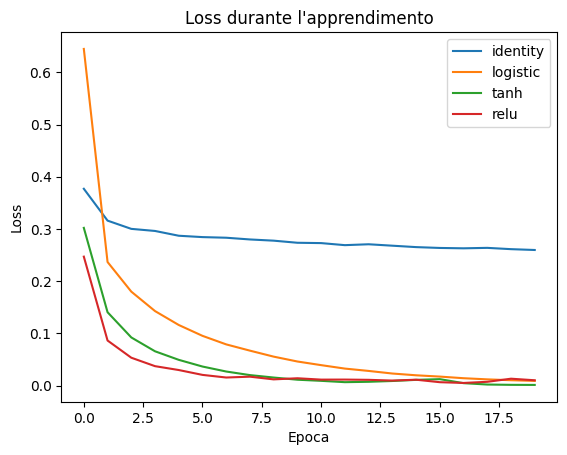

In [ ]:
activationFunction = ["identity", "logistic", "tanh", "relu"]
plt.legend(activationFunction)
for acti in activationFunction:
    MLP = MLPClassifier(hidden_layer_sizes=(500, 500),
                    activation = acti,#{identity, logistic, tanh, relu}, default=relu
                    max_iter = 20,
                    # random_state=random_state,
                    # alpha = 0.0001, #default=0.0001
                    # learning_rate= "adaptive",#learning_rate{constant, invscaling, adaptive}, default=constant
                    # learning_rate_init   = 0.1 #float, default=0.001
                    )

    MLP = MLP.fit(mnist_train_data, mnist_train_targets)
    _ = plt.plot(range(MLP.n_iter_), MLP.loss_curve_,label=acti)
    _ = plt.legend()
    _ = plt.xlabel("Epoca")
    _ = plt.ylabel("Loss")
    _ = plt.title("Loss durante l'apprendimento")
